# Decision Tree

      Age_Group Client_Gender Case_AcquisitionInfo Reporting_PHU_City  \
2           90s        FEMALE                   OB             Barrie   
4           90s        FEMALE                   OB             Ottawa   
5           60s          MALE                   OB          Newmarket   
8           90s        FEMALE                   OB            Toronto   
9           90s        FEMALE                   OB            Toronto   
...         ...           ...                  ...                ...   
14837       80s        FEMALE                   OB            Thorold   
14838       80s        FEMALE                   OB        Mississauga   
14839       80s          MALE                   OB          Newmarket   
14845       80s        FEMALE                   OB            Toronto   
14848       80s          MALE                   OB            Thorold   

      Outbreak_Related  Reporting_PHU_Latitude  Reporting_PHU_Longitude  \
2                  Yes               44.410713  

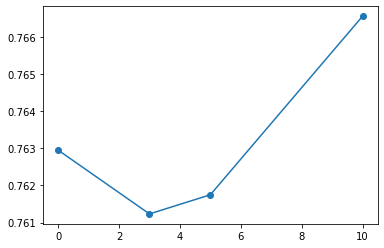

DecisionTreeClassifier(max_depth=10, random_state=42)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # input the function of cross validation
from sklearn.tree import export_graphviz
import os

train_covid = pd.read_csv(r"/Users/tangxikai/Desktop/covid_train.csv")
new_covid = train_covid.dropna()
print (new_covid)

#Filter missing values
new_covid[new_covid.notnull()]

#convert categorical features to numerical
covid_encoder = OrdinalEncoder()
covid_encoded = covid_encoder.fit_transform(new_covid)
print (covid_encoded)

#decision tree
x_feature = covid_encoded[:,0:7]
y_target = covid_encoded[:,7:8]
depth = [0,3,5,10]
accuracy=[]
tree_clf = DecisionTreeClassifier(random_state=42)

#10-fold cross validation
metric = cross_val_score(tree_clf,x_feature,y_target,cv=10) 
print(metric.mean())

accuracy.append(metric.mean()) #x:depth y accuracy
for i in range(len(depth)-1):
    tree_clf = DecisionTreeClassifier(max_depth=depth[i+1],random_state=42)
    #ten cross validation
    metric = cross_val_score(tree_clf,x_feature,y_target,cv=10) 
    print(metric.mean())
    
    accuracy.append(metric.mean()) #x:deph y accuracy
#plot the mean accuracy versus the maximum depth
plt.plot(depth, accuracy, 'o-') 
plt.show()

tree_clf = DecisionTreeClassifier(max_depth=10,random_state=42)
tree_clf.fit(x_feature,y_target)


#examine the final resulting splitting rules used for the trees
from sklearn.tree import export_graphviz
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH,"covid_tree.dot"),
        feature_names=['Age_Group','Client_Gender','Case_AcquisitionInfo','Reporting_PHU_City','Outbreak_Related','Reporting_PHU_Latitude','Reporting_PHU_Longitude'],
        class_names=['Fatal','Resolved','Not Resolved'],
        rounded=True,
        filled=True
        )